In [1]:
import pandas as pd
pd.set_option('display.max_columns', 6)  # <1>
from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt

DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/'
            '-/raw/master/src/nlpia/data')

df = pd.read_csv(DATA_DIR + '/pointcloud.csv.gz', index_col=0)

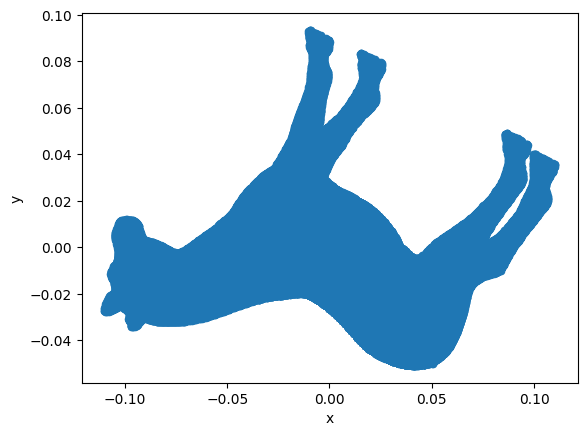

In [2]:
pca = PCA(n_components=2)  # <3>

df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))

df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [3]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

## Truncated SVD

In [4]:
import pandas as pd
pd.options.display.width = 120

In [5]:
DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/'
            '-/raw/master/src/nlpia/data')

url = DATA_DIR + '/toxic_comment_small.csv'

comments = pd.read_csv(url)
index = [f'comment {i},{"!"*j}' for (i,j) in zip(range(len(comments)), comments.toxic)]
comments = pd.DataFrame(comments.values, columns=comments.columns, index=index)
mask = comments.toxic.astype(bool).values
comments['toxic'] = comments.toxic.astype(int)
len(comments)

5000

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_tokenize(sentence):
    return [token.text for token in nlp(sentence.lower())]

tfidf_model = TfidfVectorizer(tokenizer=spacy_tokenize)
tfidf_docs = tfidf_model.fit_transform(\
    raw_documents=comments.text).toarray()

tfidf_docs.shape

C:\Users\oo_wa\.conda\envs\nlpia2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5000, 19160)

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=16, n_iter=100)  # <1>
columns = ['topic{}'.format(i) for i in range(svd.n_components)]

svd_topic_vectors = svd.fit_transform(tfidf_docs)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns=columns)
svd_topic_vectors.round(3).head()

,topic0,topic1,topic2,...,topic13,topic14,topic15
0,0.121,-0.055,0.036,...,0.088,-0.014,-0.004
1,0.215,0.141,-0.007,...,-0.013,0.054,-0.038
2,0.342,-0.200,0.046,...,0.025,-0.058,0.036
3,0.130,-0.074,0.034,...,0.016,-0.066,0.023
4,0.166,-0.081,0.036,...,0.063,0.018,-0.006


In [8]:
# assign words to all the dimensions in your transformation

#list(tfidf_model.vocabulary_.items())[:5]
column_nums, terms = zip(*sorted(zip(tfidf_model.vocabulary_.values(),
                                     tfidf_model.vocabulary_.keys())))  # <2>
terms[:5]

('\n', '\n ', '\n \n', '\n \n ', '\n  ')

In [9]:
pd.options.display.max_columns = 10

topic_term_matrix = pd.DataFrame(svd.components_, columns=terms,
                                 index=['topic{}'.format(i) for i in range(16)])
topic_term_matrix.sample(5, axis='columns',random_state=271828).head(4)  # <1>

,ᛏ,you;re,cruz,reached,chicago
topic0,0.000558,0.000208,0.000314,0.002004,0.000469
topic1,-0.000759,-0.000351,-0.000434,-0.000951,0.000315
topic2,-0.000354,-0.000005,-0.000398,-0.002873,-0.000539
topic3,0.000081,0.000104,-0.000024,-0.000006,0.000363


In [10]:
pd.options.display.max_columns = 8
toxic_terms = topic_term_matrix[
    'pathetic crazy stupid idiot lazy hate die kill'.split()
    ].round(3) * 100  # <1>
toxic_terms

,pathetic,crazy,stupid,idiot,lazy,hate,die,kill
topic0,0.3,0.1,0.7,0.6,0.1,0.4,0.2,0.2
topic1,-0.2,0.0,-0.1,-0.3,-0.1,-0.4,-0.1,0.1
topic2,0.7,0.1,1.1,1.7,-0.0,0.9,0.6,0.8
topic3,-0.2,0.0,0.0,0.1,0.1,0.0,0.0,0.2
topic4,0.7,0.2,1.3,1.5,0.3,1.8,0.7,0.0
topic5,0.4,0.2,0.7,1.9,0.1,-0.3,0.5,0.1
topic6,-0.2,-0.0,0.4,0.9,-0.1,0.1,0.9,-0.2
topic7,0.2,0.1,0.1,0.3,0.1,0.3,0.3,-0.2
topic8,0.0,-0.1,1.1,-0.6,-0.1,-0.7,0.1,-0.3
topic9,-1.7,-0.2,-2.1,-1.5,-0.4,-1.6,0.7,-0.7


In [11]:
toxic_terms.T.sum()

topic0     2.6
topic1    -1.1
topic2     5.9
topic3     0.2
topic4     6.5
topic5     3.6
topic6     1.8
topic7     1.2
topic8    -0.6
topic9    -7.5
topic10    1.0
topic11    4.0
topic12   -0.3
topic13    1.7
topic14   -4.2
topic15    1.5
dtype: float64

Topics 2 and 4 appear to be more likely to contain toxic sentiment

In [12]:
#toxic_terms.T.iloc[0:,0:1].sum()
#toxic_terms.T

## LDA-LSA for toxicity prediction

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


X_train_16d, X_test_16d, y_train_16d, y_test_16d = train_test_split(
    svd_topic_vectors, comments.toxic.values, test_size=0.5,
    random_state=271828)
lda_lsa = LinearDiscriminantAnalysis(n_components=1)
lda_lsa = lda_lsa.fit(X_train_16d, y_train_16d)
round(float(lda_lsa.score(X_train_16d, y_train_16d)), 3)

0.88

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test_16d, lda_lsa.predict(X_test_16d)).round(3)

0.346

In [15]:
hparam_table = [] #pd.DataFrame()
#this score is for a classifier thats trained in another notebook
tfidf_performance = {'classifier': 'LDA',
                     'features': 'tf-idf (spacy tokenizer)',
                     'train_accuracy': 0.99 ,
                     'test_accuracy': 0.554,
                     'test_precision': 0.383 }

### A function that stores model performances

In [16]:
from sklearn.metrics import precision_score, recall_score

# a function that creates a record in hyperparameter table.
def hparam_rec(model, X_train, y_train, X_test, y_test,
               model_name, features):
    return {
        'classifier': model_name,
        'features': features,
        'train_accuracy': float(model.score(X_train, y_train)),
        'test_accuracy': float(model.score(X_test, y_test)),
        'test_precision':
            precision_score(y_test, model.predict(X_test)),
        'test_recall':
            recall_score(y_test, model.predict(X_test)),
        'test_f1': f1_score(y_test, model.predict(X_test))
        }

In [17]:
def evaluate_model(X,y, classifier, classifier_name, features):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=271828)
    classifier = classifier.fit(X_train, y_train)
    return hparam_rec(classifier, X_train, y_train, X_test,y_test,
                      classifier_name, features)

In [18]:
lsa_performance = hparam_rec(lda_lsa, X_train_16d, y_train_16d,
       X_test_16d,y_test_16d, 'LDA', 'LSA (16 components)')
hparam_table.append(lsa_performance)
#hparam_table.T  # <1>

In [19]:
lsa_performance

{'classifier': 'LDA',
 'features': 'LSA (16 components)',
 'train_accuracy': 0.8796,
 'test_accuracy': 0.8804,
 'test_precision': 0.6030534351145038,
 'test_recall': 0.24233128834355827,
 'test_f1': 0.34573304157549234}

## LDiA

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer(tokenizer=spacy_tokenize)
index = [f'comment {i}' for i in range(len(comments))]
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=comments.text).toarray(),
                       index=index)

C:\Users\oo_wa\.conda\envs\nlpia2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
bow_docs

,0,1,2,3,...,19156,19157,19158,19159
comment 0,0,0,0,0,...,0,0,0,0
comment 1,0,1,0,0,...,0,0,0,0
comment 2,0,0,0,0,...,0,0,0,0
comment 3,0,0,0,0,...,0,0,0,0
comment 4,0,0,0,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
comment 4995,1,0,0,0,...,0,0,0,0
comment 4996,0,0,0,0,...,0,0,0,0
comment 4997,1,0,0,0,...,0,0,0,0
comment 4998,1,0,0,0,...,0,0,0,0


In [22]:
column_nums, terms = zip(*sorted(zip(counter.vocabulary_.values(),
    counter.vocabulary_.keys())))
bow_docs.columns = terms

In [23]:
DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/'
            '-/raw/master/src/nlpia/data')

url = DATA_DIR + '/toxic_comment_small.csv'

comments = pd.read_csv(url)
index2 = [f'comment {i},{"!"*j}' for (i,j) in zip(range(len(comments)), comments.toxic)]
comments = pd.DataFrame(comments.values, columns=comments.columns, index=index2)
mask = comments.toxic.astype(bool).values
#comments['toxic'] = comments.toxic.astype(int)
len(comments)

5000

In [24]:
comments.loc['comment 0,'].text

'you have yet to identify where my edits violated policy.  4 july 2005 02:58 (utc)'

In [25]:
bow_docs.loc['comment 0'][bow_docs.loc['comment 0'] > 0].head()

         1
(        1
)        1
.        1
02:58    1
Name: comment 0, dtype: int64

In [26]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA

ldia = LDiA(n_components=16, learning_method='batch')
ldia = ldia.fit(bow_docs)  # <1>
ldia.components_.shape

(16, 19160)

In [27]:
ldia.components_.T

array([[3.50359783e+00, 2.97680320e+02, 6.33914548e+02, ...,
        7.84656813e+00, 1.39907736e+02, 2.81959732e+01],
       [1.86603684e+02, 4.87133589e+01, 7.03711828e+01, ...,
        6.25000364e-02, 6.25000028e-02, 6.25000045e-02],
       [6.25000000e-02, 6.25000148e-02, 8.15874319e+00, ...,
        6.25000108e-02, 6.25000197e-02, 6.25000000e-02],
       ...,
       [6.25000000e-02, 6.25002299e-02, 1.06249977e+00, ...,
        6.25000000e-02, 6.25000000e-02, 6.25000000e-02],
       [6.25000000e-02, 6.25001871e-02, 1.06249981e+00, ...,
        6.25000000e-02, 6.25000064e-02, 6.25000000e-02],
       [1.06249998e+00, 6.25000039e-02, 6.25000000e-02, ...,
        6.25000000e-02, 6.25000000e-02, 6.25000000e-02]])

In [28]:
pd.set_option('display.width', 75)
term_topic_matrix = pd.DataFrame(ldia.components_.T, index=terms,
                                 columns=columns)  # <1>
term_topic_matrix.round(2).head(3)

,topic0,topic1,topic2,topic3,...,topic12,topic13,topic14,topic15
\n,3.50,297.68,633.91,46.11,...,7.96,7.85,139.91,28.20
\n,186.60,48.71,70.37,41.95,...,0.06,0.06,0.06,0.06
\n \n,0.06,0.06,8.16,0.06,...,0.06,0.06,0.06,0.06


In [29]:
pd.options.display.max_columns = 10

topic_term_matrix = pd.DataFrame(ldia.components_, columns=terms,
                                 index=['topic{}'.format(i) for i in range(16)])
topic_term_matrix = topic_term_matrix.T
topic_term_matrix.sample(5, axis='columns',random_state=271828).head(4)  # <1>

,topic7,topic11,topic1,topic14,topic10
\n,1.546552,22.382313,297.680320,139.907736,72.285955
\n,0.815140,0.062500,48.713359,0.062500,6.574988
\n \n,0.062500,0.062500,0.062500,0.062500,1.966256
\n \n,0.062500,0.062500,0.062500,0.062500,0.062500


In [30]:
pd.options.display.max_columns = 8
toxic_terms = topic_term_matrix.loc[
    'pathetic crazy stupid idiot lazy hate die kill'.split()
    ].round(3) # <1>
toxic_terms

,topic0,topic1,topic2,topic3,...,topic12,topic13,topic14,topic15
pathetic,1.110,0.063,0.063,0.063,...,0.063,0.063,0.063,0.063
crazy,0.063,0.063,3.158,0.063,...,0.063,0.063,0.063,0.063
stupid,1.606,0.606,8.303,1.141,...,0.063,0.063,1.290,4.213
idiot,1.169,9.203,0.063,0.063,...,0.063,0.063,0.063,0.063
lazy,1.794,0.063,1.260,0.063,...,0.063,0.063,0.063,0.063
hate,0.063,0.063,0.063,0.063,...,0.063,0.063,0.063,0.063
die,0.063,0.063,0.063,0.063,...,0.063,0.063,0.063,0.063
kill,0.063,2.986,1.065,0.063,...,0.063,0.063,31.450,0.063


In [31]:
non_trivial_terms = [term for term in topic_term_matrix.index 
                     if term.isalpha() and len(term)>3]

topic_term_matrix.topic2.loc[non_trivial_terms].sort_values(ascending=False)

that         2009.021405
this         1200.169049
article      1097.343368
have          995.088012
with          628.201093
                ...     
satin           0.062500
knowles         0.062500
dorridge        0.062500
downloads       0.062500
usstate         0.062500
Name: topic2, Length: 15129, dtype: float64

In [32]:
ldia16_topic_vectors = ldia.transform(bow_docs)
ldia16_topic_vectors = pd.DataFrame(ldia16_topic_vectors,\
    index=index, columns=columns)
ldia16_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,...,topic12,topic13,topic14,topic15
comment 0,0.0,0.00,0.00,0.23,...,0.0,0.0,0.00,0.0
comment 1,0.0,0.71,0.00,0.00,...,0.0,0.0,0.00,0.0
comment 2,0.0,0.00,0.00,0.45,...,0.0,0.0,0.00,0.0
comment 3,0.0,0.00,0.45,0.00,...,0.0,0.0,0.00,0.0
comment 4,0.0,0.00,0.73,0.00,...,0.0,0.0,0.04,0.0


### Toxicity Predictions with LDiA

In [33]:
# def evaluate_model(X,y, classifier, classifier_name, features):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.5, random_state=271828)
#     classifier = classifier.fit(X_train, y_train)
#     return hparam_rec(classifier, X_train, y_train, X_test,y_test,
#                       classifier_name, features)

In [34]:
model_ldia16 = LinearDiscriminantAnalysis()
ldia16_performance = evaluate_model(ldia16_topic_vectors, comments.toxic.values.astype(int),
                                    model_ldia16, 'LDA', 'LDIA(16 components)')

In [35]:
hparam_table.append(ldia16_performance)
hparam_table

[{'classifier': 'LDA',
  'features': 'LSA (16 components)',
  'train_accuracy': 0.8796,
  'test_accuracy': 0.8804,
  'test_precision': 0.6030534351145038,
  'test_recall': 0.24233128834355827,
  'test_f1': 0.34573304157549234},
 {'classifier': 'LDA',
  'features': 'LDIA(16 components)',
  'train_accuracy': 0.8748,
  'test_accuracy': 0.8756,
  'test_precision': 0.6086956521739131,
  'test_recall': 0.12883435582822086,
  'test_f1': 0.21265822784810126}]

### LDiA with 32 Topics

In [36]:
ldia32 = LDiA(n_components=32, learning_method='batch')
ldia32 = ldia32.fit(bow_docs)  # <1>

In [37]:
model_ldia32 = LinearDiscriminantAnalysis()
ldia32_topic_vectors = ldia32.transform(bow_docs)
columns = ['topic{}'.format(i) for i in range(ldia32.n_components)]

ldia32_topic_vectors = pd.DataFrame(ldia32_topic_vectors,\
    index=index, columns=columns)
ldia32_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,...,topic28,topic29,topic30,topic31
comment 0,0.0,0.45,0.00,0.0,...,0.0,0.0,0.0,0.0
comment 1,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0
comment 2,0.0,0.37,0.00,0.0,...,0.0,0.0,0.0,0.0
comment 3,0.0,0.60,0.00,0.0,...,0.0,0.0,0.0,0.0
comment 4,0.0,0.00,0.04,0.0,...,0.0,0.0,0.0,0.0


In [38]:
ldia32_performance = evaluate_model(ldia32_topic_vectors, comments.toxic.values.astype(int),
                                    model_ldia32, 'LDA', 'LDIA(32 components)')

In [39]:
hparam_table.append(ldia32_performance)
hparam_table

[{'classifier': 'LDA',
  'features': 'LSA (16 components)',
  'train_accuracy': 0.8796,
  'test_accuracy': 0.8804,
  'test_precision': 0.6030534351145038,
  'test_recall': 0.24233128834355827,
  'test_f1': 0.34573304157549234},
 {'classifier': 'LDA',
  'features': 'LDIA(16 components)',
  'train_accuracy': 0.8748,
  'test_accuracy': 0.8756,
  'test_precision': 0.6086956521739131,
  'test_recall': 0.12883435582822086,
  'test_f1': 0.21265822784810126},
 {'classifier': 'LDA',
  'features': 'LDIA(32 components)',
  'train_accuracy': 0.874,
  'test_accuracy': 0.8696,
  'test_precision': 0.5,
  'test_recall': 0.1165644171779141,
  'test_f1': 0.1890547263681592}]

**the above scores are not as expected, there may be errors in the code**